In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\archive (4)\jamb_exam_results.csv")

In [3]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df.shape

(5000, 17)

In [5]:
df.isna().sum()

JAMB_Score                        0
Study_Hours_Per_Week              0
Attendance_Rate                   0
Teacher_Quality                   0
Distance_To_School                0
School_Type                       0
School_Location                   0
Extra_Tutorials                   0
Access_To_Learning_Materials      0
Parent_Involvement                0
IT_Knowledge                      0
Student_ID                        0
Age                               0
Gender                            0
Socioeconomic_Status              0
Parent_Education_Level          891
Assignments_Completed             0
dtype: int64

In [6]:
df.dtypes

JAMB_Score                        int64
Study_Hours_Per_Week              int64
Attendance_Rate                   int64
Teacher_Quality                   int64
Distance_To_School              float64
School_Type                      object
School_Location                  object
Extra_Tutorials                  object
Access_To_Learning_Materials     object
Parent_Involvement               object
IT_Knowledge                     object
Student_ID                        int64
Age                               int64
Gender                           object
Socioeconomic_Status             object
Parent_Education_Level           object
Assignments_Completed             int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df['Parent_Education_Level'].nunique()

3

In [9]:
df['Parent_Education_Level'].unique()

array(['Tertiary', nan, 'Primary', 'Secondary'], dtype=object)

In [10]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('Not Educated')

In [11]:
df.isna().sum()

JAMB_Score                      0
Study_Hours_Per_Week            0
Attendance_Rate                 0
Teacher_Quality                 0
Distance_To_School              0
School_Type                     0
School_Location                 0
Extra_Tutorials                 0
Access_To_Learning_Materials    0
Parent_Involvement              0
IT_Knowledge                    0
Student_ID                      0
Age                             0
Gender                          0
Socioeconomic_Status            0
Parent_Education_Level          0
Assignments_Completed           0
dtype: int64

In [12]:
df.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


In [13]:
df.describe(include="O")

,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Gender,Socioeconomic_Status,Parent_Education_Level
count,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,2,2,2,2,3,3,2,3,4
top,Public,Urban,Yes,Yes,Medium,Medium,Female,Medium,Secondary
freq,3735,2834,2721,3346,2012,1970,2530,1967,1556


In [14]:
school = df['School_Type'].value_counts().reset_index()

In [15]:
school

,School_Type,count
0,Public,3735
1,Private,1265


In [16]:
Parent_Edu = df['Parent_Education_Level'].value_counts().reset_index()

In [17]:
Parent_Edu

,Parent_Education_Level,count
0,Secondary,1556
1,Primary,1335
2,Tertiary,1218
3,Not Educated,891


In [18]:
Tutorials = df['Extra_Tutorials'].value_counts().reset_index()

In [19]:
Tutorials

,Extra_Tutorials,count
0,Yes,2721
1,No,2279


In [20]:
cat = df.select_dtypes(['object'])

In [21]:
cat.head()

,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Gender,Socioeconomic_Status,Parent_Education_Level
0,Public,Urban,Yes,Yes,High,Medium,Male,Low,Tertiary
1,Public,Rural,No,Yes,High,High,Male,High,Not Educated
2,Public,Rural,Yes,Yes,High,Medium,Female,High,Tertiary
3,Public,Urban,No,Yes,Medium,High,Female,Medium,Tertiary
4,Public,Urban,No,Yes,Medium,Medium,Female,Medium,Tertiary


In [22]:
num = df.select_dtypes(['int','float'])

In [23]:
num.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
0,192,22,78,4,12.4,1,17,2
1,207,14,88,4,2.7,2,15,1
2,182,29,87,2,9.6,3,20,2
3,210,29,99,2,2.6,4,22,1
4,199,12,98,3,8.8,5,22,1


In [24]:
Gender= df.groupby('Gender')['JAMB_Score'].mean().reset_index()
Gender

,Gender,JAMB_Score
0,Female,174.763241
1,Male,173.369231


In [25]:
School_Type= df.groupby('School_Type')['JAMB_Score'].mean().reset_index()
School_Type

,School_Type,JAMB_Score
0,Private,181.216601
1,Public,171.655689


In [26]:
Location= df.groupby('School_Location')['JAMB_Score'].mean().reset_index()
Location

,School_Location,JAMB_Score
0,Rural,172.549861
1,Urban,175.239944


In [27]:
Tutorials= df.groupby('Extra_Tutorials')['JAMB_Score'].mean().reset_index()
Tutorials

,Extra_Tutorials,JAMB_Score
0,No,170.566477
1,Yes,177.012863


In [28]:

Materials= df.groupby('Access_To_Learning_Materials')['JAMB_Score'].mean().reset_index()
Materials

,Access_To_Learning_Materials,JAMB_Score
0,No,170.875453
1,Yes,175.656007


In [29]:
tech = df.groupby('IT_Knowledge')['JAMB_Score'].mean().reset_index()
tech

,IT_Knowledge,JAMB_Score
0,High,187.303872
1,Low,166.834962
2,Medium,172.865990


In [30]:
status=df.groupby('Socioeconomic_Status')['JAMB_Score'].mean().reset_index()
status

,Socioeconomic_Status,JAMB_Score
0,High,190.744917
1,Low,164.772424
2,Medium,174.131164


In [31]:
parent_knowledge= df.groupby('Parent_Education_Level')['JAMB_Score'].mean().reset_index()
parent_knowledge

,Parent_Education_Level,JAMB_Score
0,Not Educated,162.569024
1,Primary,169.112360
2,Secondary,176.573265
3,Tertiary,184.738095


In [32]:
df[['Study_Hours_Per_Week', 'Attendance_Rate', 'Distance_To_School',
    'Assignments_Completed', 'Age', 'JAMB_Score']].corr()['JAMB_Score']


Study_Hours_Per_Week     0.420061
Attendance_Rate          0.280953
Distance_To_School      -0.094142
Assignments_Completed    0.278079
Age                     -0.028432
JAMB_Score               1.000000
Name: JAMB_Score, dtype: float64

In [33]:
df.groupby(['Gender', 'School_Type'])['JAMB_Score'].mean().reset_index()

,Gender,School_Type,JAMB_Score
0,Female,Private,181.711278
1,Female,Public,172.285791
2,Male,Private,180.668333
3,Male,Public,171.027273


In [34]:
df[['Study_Hours_Per_Week', 'Attendance_Rate', 'Distance_To_School',
    'Assignments_Completed', 'Age', 'JAMB_Score']].corr()['JAMB_Score']


Study_Hours_Per_Week     0.420061
Attendance_Rate          0.280953
Distance_To_School      -0.094142
Assignments_Completed    0.278079
Age                     -0.028432
JAMB_Score               1.000000
Name: JAMB_Score, dtype: float64

In [35]:
corr = num.corr()

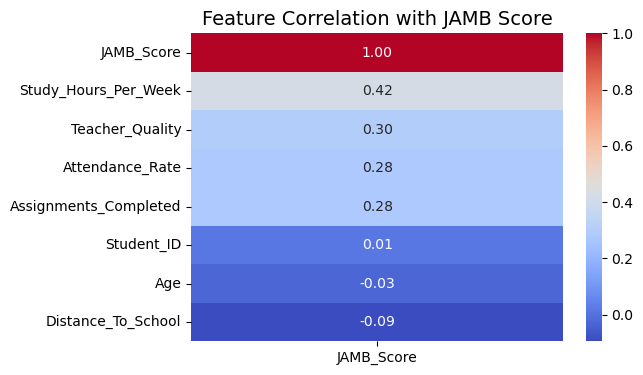

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr[['JAMB_Score']].sort_values(by='JAMB_Score', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with JAMB Score', fontsize=14)
plt.show()


In [37]:
df= df.drop(columns= ['Student_ID'])

<Axes: ylabel='count'>

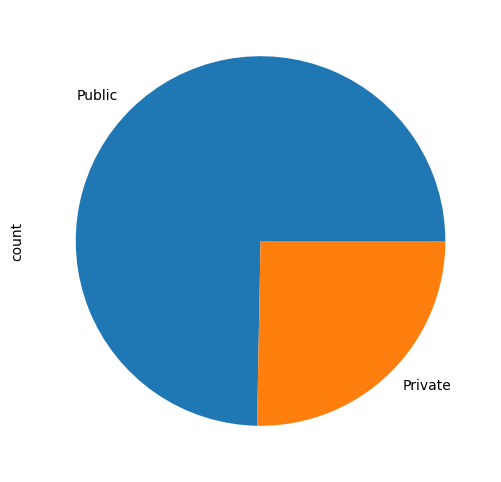

In [38]:
df["School_Type"].value_counts().plot(kind = 'pie', figsize = (6,6))

<Axes: xlabel='Parent_Education_Level'>

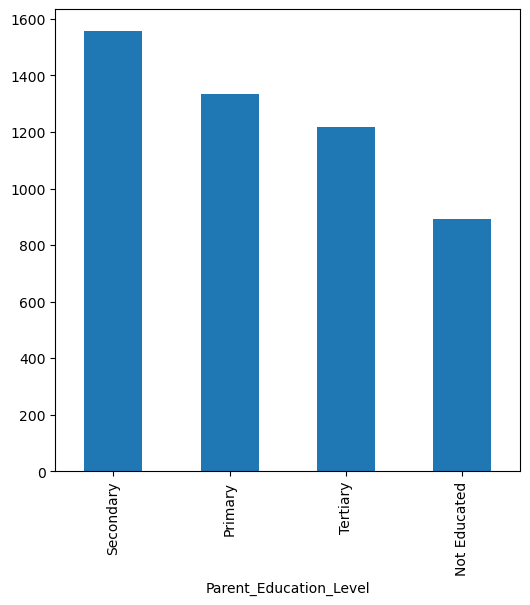

In [39]:
df["Parent_Education_Level"].value_counts().plot(kind = 'bar', figsize = (6,6))

<Axes: xlabel='Age'>

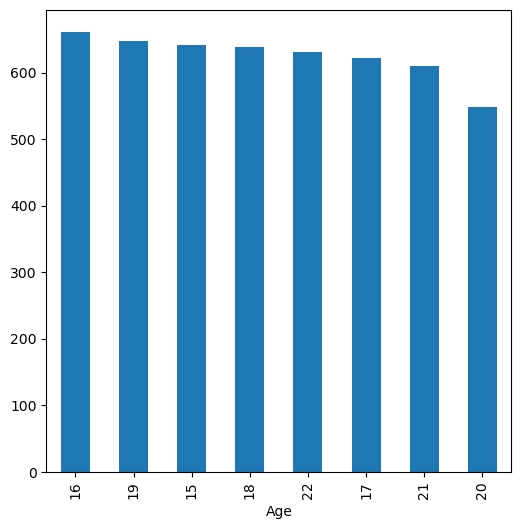

In [40]:
df["Age"].value_counts().plot(kind = 'bar', figsize = (6,6))

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3 = df
df3.School_Type = le.fit_transform(df3.School_Type)
df3.School_Location = le.fit_transform(df3.School_Location)
df3.Extra_Tutorials = le.fit_transform(df3.Extra_Tutorials)
df3.Access_To_Learning_Materials = le.fit_transform(df3.Access_To_Learning_Materials)
df3.Parent_Involvement = le.fit_transform(df3.Parent_Involvement)
df3.IT_Knowledge = le.fit_transform(df3.IT_Knowledge)
df3.Gender = le.fit_transform(df3.Gender)
df3.Socioeconomic_Status = le.fit_transform(df3.Socioeconomic_Status)
df3.Parent_Education_Level = le.fit_transform(df3.Parent_Education_Level)
df3.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,1,1,1,1,0,2,17,1,1,3,2
1,207,14,88,4,2.7,1,0,0,1,0,0,15,1,0,0,1
2,182,29,87,2,9.6,1,0,1,1,0,2,20,0,0,3,2
3,210,29,99,2,2.6,1,1,0,1,2,0,22,0,2,3,1
4,199,12,98,3,8.8,1,1,0,1,2,2,22,0,2,3,1


In [42]:
df.shape

(5000, 16)

In [43]:
y = df3.JAMB_Score
X = df3.drop(["JAMB_Score"], axis = 1)
#X.head()

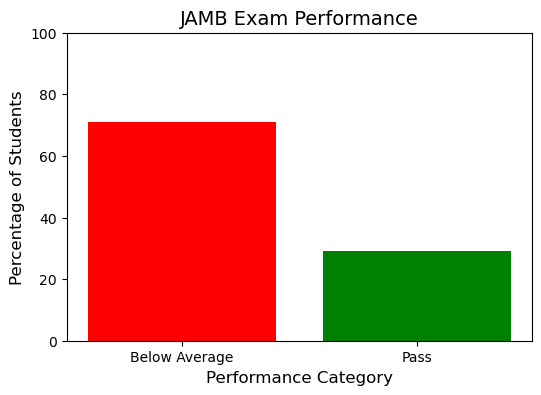

In [44]:
def categ_scores(score):
    if score <= 199:
        return 'Below Average'
   
    else:
        return 'Pass'
    
y_category = pd.Series(y).apply(categ_scores)
#y_category = le.fit_transform(y_category)
# visualizing the categories
counts = y_category.value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
bars = plt.bar(counts.index, counts.values, color=['red', 'green'])
plt.title("JAMB Exam Performance", fontsize=14)
plt.ylabel("Percentage of Students", fontsize=12)
plt.xlabel("Performance Category", fontsize=12)
plt.ylim(0,100)
plt.show()

In [45]:
y_category.value_counts()

JAMB_Score
Below Average    3547
Pass             1453
Name: count, dtype: int64

<Axes: xlabel='JAMB_Score'>

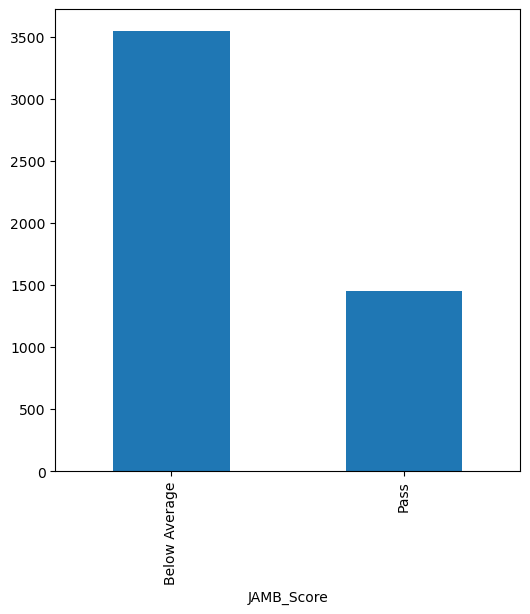

In [46]:
y_category.value_counts().plot(kind = 'bar', figsize = (6,6))

In [47]:
y_category = le.fit_transform(y_category)
y_category

array([0, 1, 0, ..., 1, 0, 1])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_category, train_size=0.8, test_size=0.2, random_state=40) 
#y_train.value_counts()

In [49]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler_x = StandardScaler()

X_trained_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

#y_trained_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
#y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).ravel()

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #max_iter=1000, C = 5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.774

In [51]:
from xgboost import XGBClassifier 
model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.732

In [52]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0, random_state=24, iterations=500, depth=6, learning_rate=0.001)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.77

In [53]:
from lightgbm import LGBMClassifier
model = LGBMClassifier() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

[LightGBM] [Info] Number of positive: 1159, number of negative: 2841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.289750 -> initscore=-0.896599
[LightGBM] [Info] Start training from score -0.896599


0.751

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.755

In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.676

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() #max_iter=1000, C = 5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.774

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)
rec = recall_score(y_test, y_pred, average="weighted")
print(rec)
prec = precision_score(y_test, y_pred, average="weighted")
print(prec)
f1 = f1_score(y_test, y_pred, average="weighted")
print(f1)
#roc = roc_auc_score(y_test, y_pred, average="weighted")
#print(roc)

0.774
0.774
0.7618991836411192
0.7566039473684212


In [65]:
# Classification Report and Confusion Matrix
model_report = classification_report(y_test, y_pred, output_dict=True)
conf_mat = confusion_matrix(y_test, y_pred)

In [66]:
model_report = pd.DataFrame(model_report).T

model_report

,precision,recall,f1-score,support
0,0.794840,0.916431,0.851316,706.000
1,0.682796,0.431973,0.529167,294.000
accuracy,0.774000,0.774000,0.774000,0.774
macro avg,0.738818,0.674202,0.690241,1000.000
weighted avg,0.761899,0.774000,0.756604,1000.000


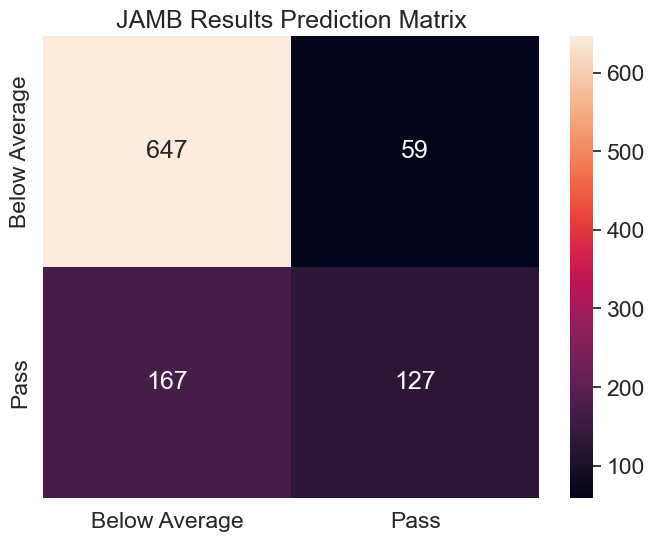

In [67]:
conf_mat = pd.DataFrame(conf_mat, index=le.classes_, columns=le.classes_)

sns.set(font_scale=1.5)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.title('JAMB Results Prediction Matrix')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13244\3090599253.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x="Importance (%)", data=top_15_importances, palette='colorblind')


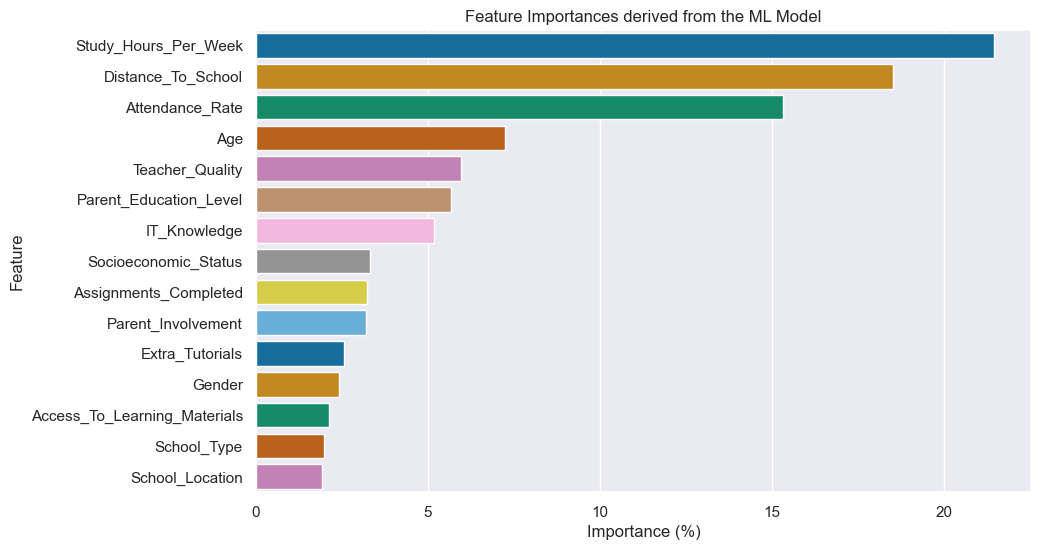

In [60]:
## PLOT THE FEATURE IMPORTANCE
"""
Feature Importance refers to techniques that calculate a score
for all the input features for a given model
— the scores simply represent the “importance” of each feature
"""

importances_df = pd.Series(model.feature_importances_ * 100, list(X_train.columns)).to_frame()

top_15_importances = importances_df.reset_index().rename(columns ={
                              'index': 'Feature',
                              0: 'Importance (%)'  
                            }).sort_values('Importance (%)', ascending=False).head(15)
sns.set(font_scale=1)
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x="Importance (%)", data=top_15_importances, palette='colorblind')
plt.title('Feature Importances derived from the ML Model')
plt.show()

In [61]:
results = {"Model": ["LogisticRegression","XGBClassifier","CatBoostClassifier","LGBMClassifier","RandomForestClassifier","DecisionTreeClassifier"],
    "Accuracy": [0.774,0.732,0.770,0.751,0.755,0.674]}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy
0,LogisticRegression,0.774
1,XGBClassifier,0.732
2,CatBoostClassifier,0.770
3,LGBMClassifier,0.751
4,RandomForestClassifier,0.755
5,DecisionTreeClassifier,0.674


In [62]:
import pickle 
filename = "model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    print("Saved")

Saved


In [71]:
# Define all models in a dictionary
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "XGBClassifier": XGBClassifier(eval_metric='mlogloss'),
    "CatBoostClassifier": CatBoostClassifier(verbose=0),
    "LGBMClassifier": LGBMClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Train and evaluate
from sklearn.metrics import classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("="*60)
    print(f" Model: {name}")
    print("="*60)
    print(f"Accuracy: {model.score(X_test, y_test):.3f}")
    print(classification_report(y_test, y_pred))

 Model: LogisticRegression
Accuracy: 0.777
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       706
           1       0.68      0.46      0.55       294

    accuracy                           0.78      1000
   macro avg       0.74      0.68      0.70      1000
weighted avg       0.77      0.78      0.76      1000

 Model: XGBClassifier
Accuracy: 0.732
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       706
           1       0.56      0.44      0.49       294

    accuracy                           0.73      1000
   macro avg       0.67      0.65      0.65      1000
weighted avg       0.72      0.73      0.72      1000

 Model: CatBoostClassifier
Accuracy: 0.760
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       706
           1       0.64      0.42      0.51       294

    accuracy                           0.76      1000
   m